# Práctica 1: Acceso a datos mediante pandas

## Introducción

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web titulada [*List of countries by past and projected future population*](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population) se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de pandas, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías:

[pandas](https://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.

[matplotlib](https://matplotlib.org/) permite generar múltiples tipos de gráficos.  

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos pandas
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles.

In [1]:
# Importamos las librerías pandas y matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union

# Indicamos que los gráficos se muestren directamente debajo de las celdas de código en el cuaderno
%matplotlib inline

## Extraer las tablas a partir de un documento HTML de la Wikipedia

En este documento HTML el separador de decimales es el punto y el de miles es la coma. Utilizaremos el método `read_html()` de la librería pandas para leer las tablas que hay en el fichero HTML. Con la función `len()` podemos ver el número de tablas que hemos leído con datos de países (deberían ser tres).

In [2]:
# Identificamos y guardamos la URL en una variable

url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population"

In [3]:
# Leemos las tablas del documento HTML
data_raw = pd.read_html(url)

# Seleccionamos las tablas que nos interesan
valid_data = data_raw[1:4]

# Imprimimos el número de tablas que hemos leído con datos de países mediante la función len()
print(len(valid_data))




3


## Construir una sola tabla con la información de población

Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas `join()`, `merge()`, o `concat()`, extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método `head()` para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [4]:
# Reunimos las tres tablas en una sola
# data = pd.merge(valid_data[0], valid_data[1], left_on="Country (or dependent territory)", right_on="Country (or dependent territory)")
# data = pd.merge(data, valid_data[2], left_on="Country (or dependent territory)", right_on="Country (or dependent territory)")

new_valid_data = valid_data.copy()
for k in range(3):
    new_valid_data[k] = new_valid_data[k].set_index(new_valid_data[k].columns[0])

data = pd.concat(new_valid_data, axis=1)

# Imprimimos las primeras filas a modo de comprobación, mediante head()
print(data.head())

# Generamos una lista con las etiquetas de las columnas del DataFrame, mediante list()
list(data.columns)

# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric()
# Las guardamos en una lista
# Puede ser útil el utilizar la noción de comprensión de listas, por sencillez
column_names = pd.Series(data.columns)
numeric_columns_bool = list(column_names.str.isnumeric())
numeric_columns = data.columns[numeric_columns_bool]

# Leemos la tabla por fechas y la almacenamos para su uso
# Imprimimos para verificar que es correcto
data = data[numeric_columns]
data





                                  1950  1955     %   1960   %.1   1965    %.2  \
Country (or dependent territory)                                                
Afghanistan                       8151  8892  1.76   9830  2.03  10998   2.27   
Albania                           1228  1393  2.56   1624  3.12   1884   3.02   
Algeria                           8893  9842  2.05  10910  2.08  11964   1.86   
American Samoa                      20    20  0.72     21  0.20     25   4.23   
Andorra                              7     7  0.04      9  6.28     14  10.17   

                                   1970   %.3   1975  ...   2030   %.2   2035  \
Country (or dependent territory)                      ...                       
Afghanistan                       12431  2.48  14133  ...  45665  2.12  50195   
Albania                            2157  2.74   2402  ...   3103 -0.01   3063   
Algeria                           13932  3.09  16141  ...  48149  0.99  50118   
American Samoa             

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
Country (or dependent territory),,,,,,,,,,,,,,,,,,,,,
Afghanistan,8151,8892,9830,10998,12431,14133,15045,13120.0,13569.0,19446.0,...,26335.0,29121.0,32565.0,36644,41118,45665,50195,54717,59256,63796
Albania,1228,1393,1624,1884,2157,2402,2672,2957.0,3245.0,3159.0,...,3025.0,2987.0,3030.0,3075,3105,3103,3063,2994,2913,2825
Algeria,8893,9842,10910,11964,13932,16141,18807,22009.0,25191.0,28322.0,...,32918.0,35950.0,39543.0,42973,45842,48149,50118,52030,53894,55445
American Samoa,20,20,21,25,28,30,33,39.0,48.0,54.0,...,57.0,56.0,55.0,54,54,53,52,51,50,50
Andorra,7,7,9,14,20,27,34,45.0,53.0,64.0,...,77.0,85.0,86.0,86,86,85,83,82,79,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,10,16,28,50,90,73,125,180.0,218.0,264.0,...,416.0,492.0,571.0,653,736,822,909,998,1086,1174
Yemen,4778,5266,5872,6511,7099,7935,9133,10540.0,12417.0,14832.0,...,20003.0,23210.0,26738.0,29885,32823,35660,38437,41142,43710,46081
Zambia,2554,2870,3255,3695,4241,4849,5541,6536.0,7604.0,8691.0,...,11373.0,13042.0,15067.0,17427,20105,23137,26546,30339,34497,38993


## Algunas funciones de acceso a datos para una trama de pandas

Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1

Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025 a partir de una indexación mediante el uso de la propiedad `.loc`.

In [5]:
# Creamos una subtabla
countries_to_locate = ["Germany", "Andorra", "Angola"]
date_ini = "2015"
date_fin = "2025"
data.loc[countries_to_locate, date_ini:date_fin]

,2015,2020,2025
Country (or dependent territory),,,
Germany,80855.0,82983,80025
Andorra,86.0,86,86
Angola,19626.0,22485,25674


### Ejercicio 2

Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9 a partir de una indexación mediante el uso de la propiedad `.iloc`.

In [6]:
# Creamos una subtabla
data.iloc[2:8, 4:9]


,1970,1975,1980,1985,1990
Country (or dependent territory),,,,,
Algeria,13932,16141,18807,22009.0,25191.0
American Samoa,28,30,33,39.0,48.0
Andorra,20,27,34,45.0,53.0
Angola,5606,6051,7206,8390.0,9486.0
Anguilla,7,7,7,7.0,9.0
Antigua and Barbuda,66,69,69,65.0,65.0


### Ejercicio 3

Imprimir la columna correspondiente al año 1955 mediante selección por el nombre de la columna.

In [7]:
# Mostramos una columna
data["1955"]


Country (or dependent territory)
Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
Yemen                5266
Zambia               2870
Zimbabwe             3410
World             2782099
Name: 1955, Length: 228, dtype: int64

### Ejercicio 4

Imprimir los datos de la fila número 15 mediante la propiedad `.iloc`.

In [8]:
# Seleccionamos una fila
print(data.iloc[14])

1950     71.0
1955     88.0
1960    113.0
1965    140.0
1970    171.0
1975    190.0
1980    210.0
1985    229.0
1990    246.0
1995    266.0
2000    283.0
2005    297.0
2010    311.0
2015    325.0
2020    338.0
2025    350.0
2030    359.0
2035    365.0
2040    369.0
2045    372.0
2050    372.0
Name: Bahamas, dtype: float64


### Ejercicio 5

Imprimir la población de Barbados en 1995 mediante la propiedad `.loc`.

In [9]:
# Seleccionamos una celda
data.loc["Barbados", "1995"]


268.0

### Ejercicio 6

Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [10]:
# Utilizamos la función drop() para eliminar los valores totales mundiales
if "World" in data.index:
    data = data.drop("World", axis=0)

# Utilizamos la función max() para calcular el máximo
print(data["1975"].max())

# Utilizamos idxmax() para identificar el país que corresponde al valor máximo
print(data["1975"].idxmax())


920295
China


### Ejercicio 7

Imprimir los nombres de las filas con la propiedad `.index`.

In [11]:
# Nombres de las filas
data.index


Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country (or dependent territory)', length=227)

## Dibujar la población de cuatro países en un año

Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando la librería matplotlib.

<BarContainer object of 4 artists>

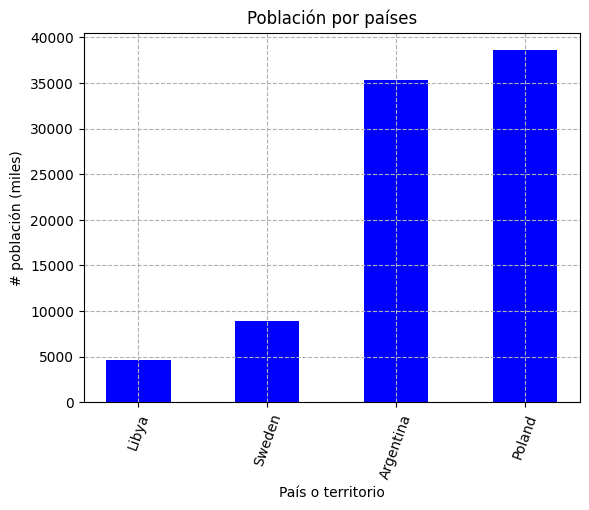

In [12]:
# Mediante la función plt.bar() de matplotlib
countries = ["Argentina", "Sweden", "Poland", "Libya"]
dates = ["1995"]
data_plot = data.loc[countries, dates]
data_plot = data_plot.sort_values(by="1995")
countries = data_plot.index

plt.grid(ls="--")
plt.xticks(rotation=70)
plt.title("Población por países")
plt.ylabel("# población (miles)")
plt.xlabel("País o territorio")
plt.bar(countries, data_plot["1995"], width=.5, color="blue")



Text(0, 0.5, '# población (miles)')

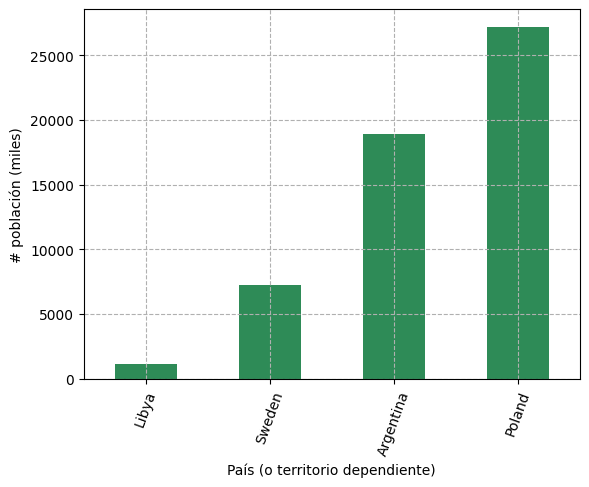

In [13]:
# Mediante la función .plot() de pandas

# Generamos una lista con los nombres de los países del enunciado
countries = ["Argentina", "Sweden", "Poland", "Libya"]
dates = ["1955"]


# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos
data_plot = data.loc[countries, dates]


# Utilizamos la función .sort_values() para ordenar la subtabla y .plot(kind='bar') para dibujar    
data_plot = data_plot.sort_values(by="1955")
data_plot.plot(kind="bar", color="seagreen", legend=False)


# Podemos utilizar plt.ylabel() para especificar '# población (miles)'
plt.ylabel("población (miles)")


# Podemos utilizar plt.xlabel() para especificar 'País (o territorio dependiente)'
plt.xlabel("País (o territorio dependiente)");

# Realizamos el resto de configuraciones del plot
plt.grid(ls="--")
plt.xticks(rotation=70)
plt.ylabel("# población (miles)")



## Dibujar la evolución de la población de cuatro países

Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

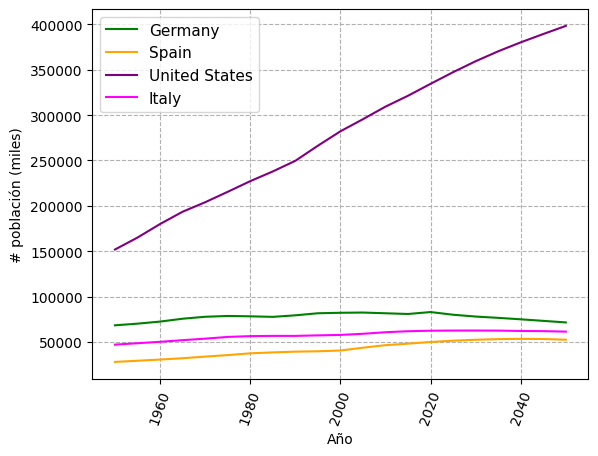

In [14]:
# Mediante la función plt.plot() de matplotlib
countries = ["Germany", "Spain", "United States", "Italy"]
data_plot = data.loc[countries]
dates = list(data_plot.columns)
dates = list(map(int, dates))

colors = ["green", "orange", "purple", "fuchsia"]
for country,color in zip(countries,colors):
    plt.plot(dates, data_plot.loc[country], label=country, color=color)
plt.ylabel("# población (miles)")
plt.xlabel("Año")
plt.xticks(rotation=70)
plt.grid(ls="--")
plt.legend(fontsize=11)

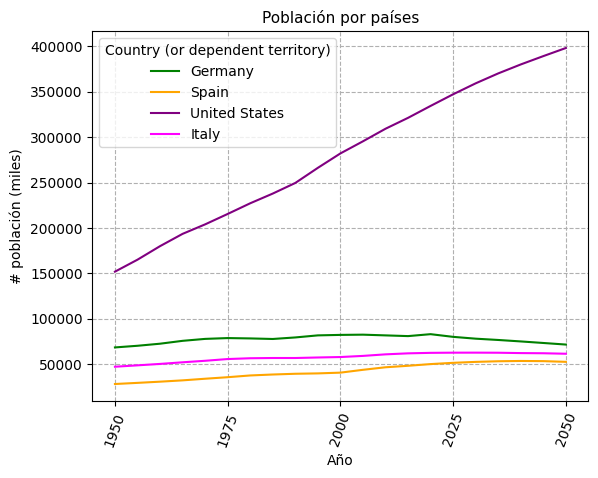

In [15]:
# Mediante la función .plot() de pandas

# Generamos una lista con los nombres de los países del enunciado
countries = ["Germany", "Spain", "United States", "Italy"]


# Generamos la subtabla correspondiente con la propiedad .loc
data_plot = data.loc[countries].T
    
# Utilizamos la función plot(kind='line') para dibujar
data_plot.plot(kind="line", color=colors)

# Ponemos el titulo con title()
plt.title("Población por año")


# Etiquetamos con xlabel() e ylabel()
plt.xlabel("Año")
plt.ylabel("Población")

# Configuramos el resto del plot
index = data_plot.index
plt.grid(which="major", ls="--")
plt.xticks(list(range(0, len(index), 5)), rotation=70)
plt.ylabel("# población (miles)")
plt.title("Población por países", fontsize=11);



## Dibujar la evolución de los cinco países más populosos hasta 2010 y 2050  

Dibujar dos gráficas: una con la evolución para todo el periodo de los cinco países más populosos en 2010, y otra con los cinco países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

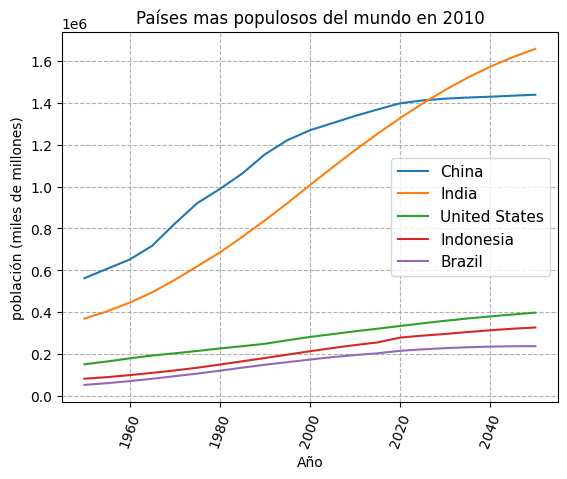

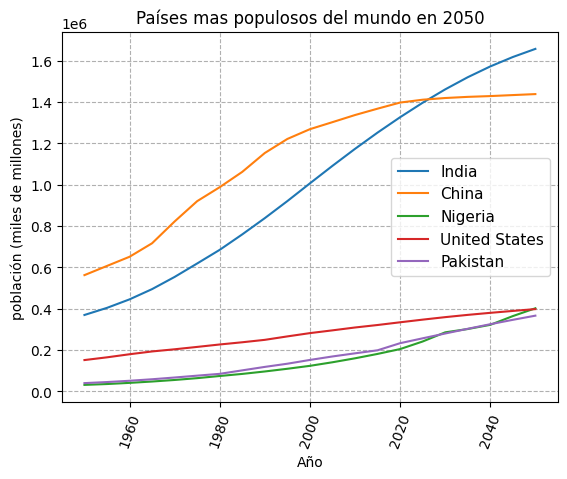

In [16]:

# Mediante la función plt.plot() de matplotlib

# Definimos la función plot_populosos()
def plot_populosos(tabla: pd.DataFrame, año: Union[str, int]) -> None:
    # Ordenamos la tabla según el año
    if año != str:
        año = str(año)
    sorted_table: pd.DataFrame = tabla.sort_values(by=año, ascending=False)
    sorted_table = sorted_table[:5]
    
    dates = tabla.columns
    dates = list(map(int, dates))
    countries = sorted_table.index.values
    
    plt.plot(dates, sorted_table.T, label=countries)
    plt.grid(ls="--")
    plt.title(f"Países mas populosos del mundo en {año}")
    plt.xlabel("Año")
    plt.ylabel("población (miles de millones)")
    plt.xticks(rotation=70)
    plt.legend(fontsize=11, loc="right")
    plt.show()

plot_populosos(data, 2010)
plot_populosos(data, 2050)

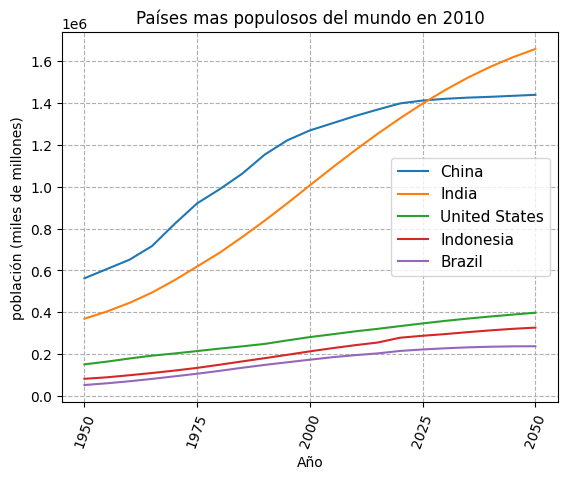

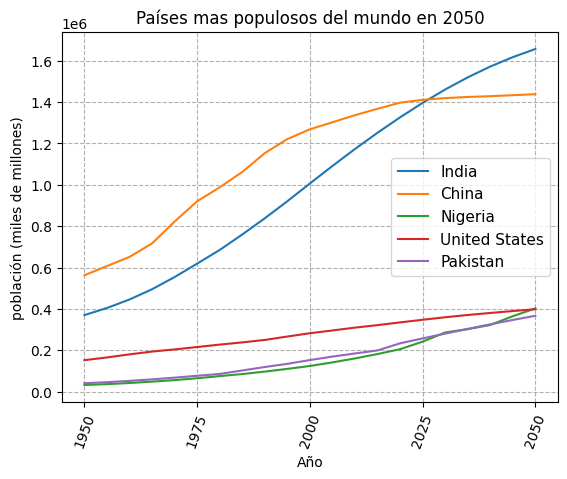

In [17]:
# Mediante la función .plot() de pandas

# Definimos la función plot_populosos()
def plot_populosos(tabla: pd.DataFrame, año: Union[str, int]) -> None:
    # Ordenamos la tabla según el año
    if año != str:
        año = str(año)
    sorted_table: pd.DataFrame = tabla.sort_values(by=año, ascending=False)
    
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    sorted_table = sorted_table.iloc[:5]
    
    # Utilizamos los nombres para invocar la subtabla mediante .loc y dibujamos mediante plot(kind='line')
    sorted_table.T.plot(kind="line")
    plt.grid(ls="--")
    plt.title(f"Países mas populosos del mundo en {año}")
    plt.xlabel("Año")
    plt.xticks(list(range(0, len(sorted_table.columns), 5)), rotation=70)
    plt.ylabel("población (miles de millones)")
    plt.legend(loc="right", fontsize=11)
    
# Invocamos la función plot_populosos()
# Los valores mundiales no deben estar presentes en la tabla
plot_populosos(data, 2010)
plot_populosos(data, 2050)